In [9]:
import pandas_datareader as pdr
import pandas as pd


In [10]:
# key='48802897e8904730a9d52c5122aad85607f18775'
# df=pdr.get_data_tiingo('AAPL',api_key=key)

In [11]:
df=pd.read_csv('AAPL.csv')

In [12]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [13]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [14]:
df1=df.reset_index()['close']

In [15]:
df1.shape

(1258,)

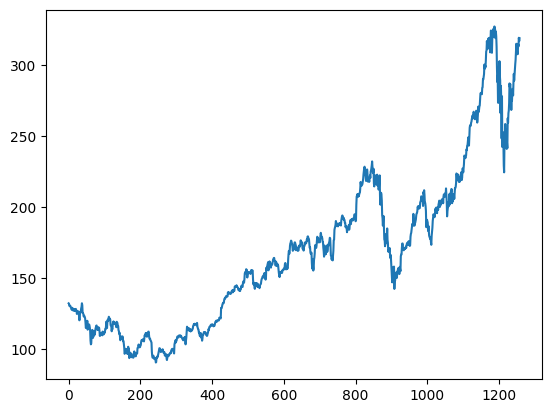

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
import numpy as np

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(817, 441)

In [21]:
def  create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)


In [22]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [23]:
x_train.shape

(716, 100)

In [24]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [25]:
x_train.shape

(716, 100, 1)

In [26]:

#stacked lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - loss: 0.0238 - val_loss: 0.0661
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 9.9099e-04 - val_loss: 0.0066
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 7.4603e-04 - val_loss: 0.0037
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 6.3939e-04 - val_loss: 0.0037
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 6.0664e-04 - val_loss: 0.0038
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - loss: 6.0402e-04 - val_loss: 0.0037
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 5.8777e-04 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 6.4755e-04 - val_loss: 0.0034
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 5.8528e-04 - val_loss: 0.0033
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 6.1162e-04 - val_loss: 0.0033
Epoch

In [33]:
import tensorflow as tf

In [43]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [44]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.38760825274971

In [46]:
math.sqrt(mean_squared_error(y_test,test_predict))

236.91650584060147

NameError: name 'trainPredictPlot' is not defined

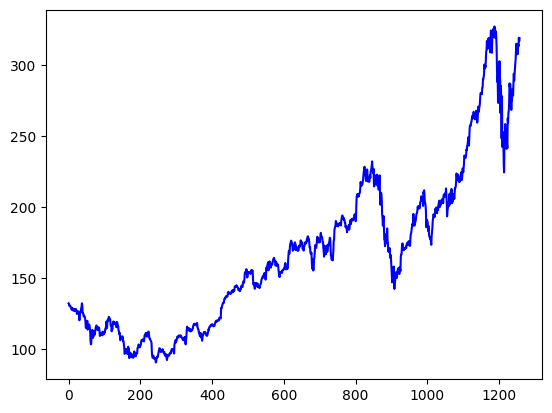

In [47]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Actual Data', color='blue')
plt.plot(trainPredictPlot, label='Train Prediction', color='orange')
plt.plot(testPredictPlot, label='Test Prediction', color='green')

# add labels and legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()  # shows the labels
plt.show()


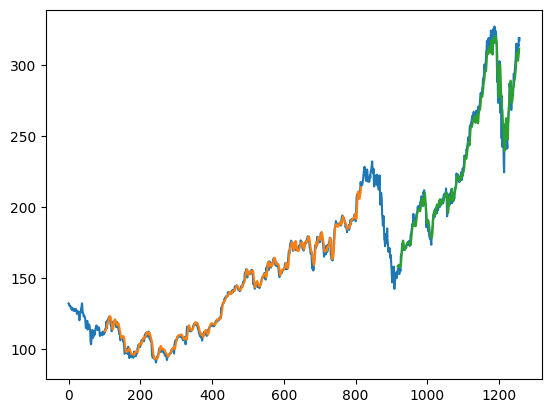

In [49]:
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

testPredictPlot=np.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+look_back*2+1:len(df1)-1, :]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [50]:
len(test_data)

441

In [51]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
from numpy import array
lst_op=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{}day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_op.extend(yhat.tolist())
    i+=1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_op.extend(yhat.tolist())
    i+=1
print(lst_op)


[0.9419806]
101
1day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [57]:
df3=df1.tolist()
df3.extend(lst_op)


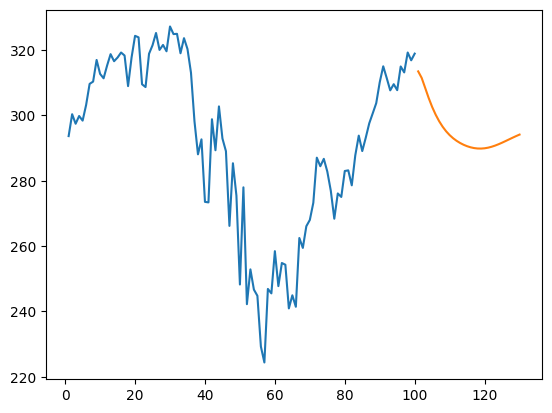

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_op))

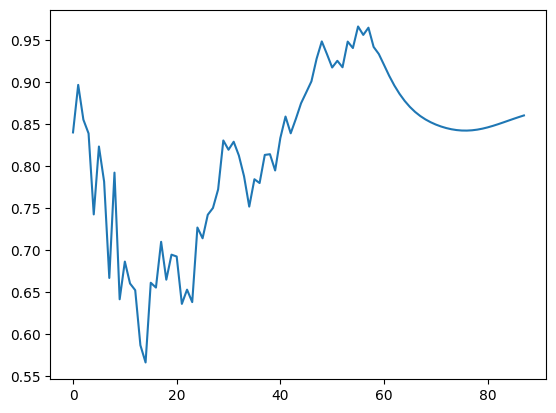

In [60]:
df3=df1.tolist()
df3.extend(lst_op)
plt.plot(df3[1200:])

In [61]:
from google.colab import auth
auth.authenticate_user()

In [63]:
!git config --global user.email "tt1240965@iitd.ac.in"
!git config --global user.name "CaptainGaurav007"


In [66]:
!git clone https://github.com/CaptainGaurav007/Stock_prediction_by_LSTM.git


Cloning into 'Stock_prediction_by_LSTM'...


In [67]:
%cd /content/Stock_prediction_by_LSTM


/content/Stock_prediction_by_LSTM


In [68]:
!cp /content/Stock_market_by_lstm.ipynb .


cp: cannot stat '/content/Stock_market_by_lstm.ipynb': No such file or directory


In [69]:
!ls /content


AAPL.csv  sample_data  Stock_prediction_by_LSTM
